# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('data.csv')
except FileNotFoundError:
    print("ФАЙЛ НЕ УДАЛОСЬ НАЙТИ ЛОКАЛЬНО, СКАЧИВАЮ ИЗ ОБЛАКА")
    data = pd.read_csv('####')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [22]:
data[data.debt == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21518,0,373995.710838,59,среднее,1,женат / замужем,0,F,пенсионер,0,153864,сделка с автомобилем,C,операции с автомобилем
21519,1,2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949,покупка коммерческой недвижимости,C,операции с недвижимостью
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# Взглянем на данные
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


В таблице только 3 столбца которые характеризуют кредит - это debt, purpose и purpose_category. Поскольку последние 2 описывают цели взятия кредита, то предположим что в столбце debt 0 это погашенный в срок кредит, а 1 просрочка. Хотя в явном виде описания того что содержится в столбце нигде нет. Посчитаем размер сравниваемых групп(0, 1, 2 итд ребенка) и среднюю долю невозврата кредита по группам.

In [24]:
# размер сравниваемых групп
data.groupby('children')['children'].count()

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [25]:
# средняя доля невозврата кредита по группам
data.groupby('children')['debt'].agg('mean')

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

In [26]:
# Сводная таблица
data.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


**Вывод:** Судя по данным, люди без детей возвращают кредиты чаще, а люди с детьми являются худшими заемщиками. Процент просроченых кредитов у людей с детьми в среднем около 9.2, а у людей без детей около 7.5.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
# Взглянем на данные
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Судя по всему нужные столбцы это family_status и family_status_id. Для удобства восприятия будем пользоваться family_status так как family_status_id является оцифровкой первого. Начнем с рачета размера сравниваемых групп.

In [28]:
# размер сравниваемых групп
data.groupby('family_status')['family_status'].count()

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: family_status, dtype: int64

In [29]:
# средняя доля невозврата кредита
print('средняя доля невозврата кредита в процентах\n',
      data.groupby('family_status')['debt'].agg('mean')*100)

средняя доля невозврата кредита в процентах
 family_status
Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.313014
женат / замужем          7.560558
Name: debt, dtype: float64


In [30]:
# сводная таблица
data.groupby('family_status')['debt'].agg(['count', 'mean'])

,count,mean
family_status,,
Не женат / не замужем,2796,0.097639
в разводе,1189,0.070648
вдовец / вдова,951,0.066246
гражданский брак,4134,0.093130
женат / замужем,12261,0.075606


**Вывод:** Результаты представлены в таблице выше. Самая высокая доля невозврата кредита у холостых, а самая низкая у овдовевших. Как видно из сводной таблицы люди никогда не состоявшие в официальном браке имеют больший риск невозврата кредита.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
# Взглянем на данные
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Нам необходим предварительно созданный нами столбец total_income_category. Так как он разбивает доход на несколько категорий которые можно сравнивать между собой.

In [32]:
# оценим размеры групп для сравнения
data.groupby('total_income_category')['total_income_category'].count()

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: total_income_category, dtype: int64

Как и во всех предыдущих случаях группы очень сильно отличаются по размеру. Ради интереса посмотрим на распределение зарплат построив гистограмму. Будем изменять количество корзин с целью выяснить получится ли разбить данные на равные промежутки.

(array([1.9204e+04, 1.9360e+03, 1.4600e+02, 2.2000e+01, 1.2000e+01,
        4.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  20667.        ,  270104.44444444,  519541.88888889,
         768979.33333333, 1018416.77777778, 1267854.22222222,
        1517291.66666667, 1766729.11111111, 2016166.55555556,
        2265604.        ]),
 <BarContainer object of 9 artists>)

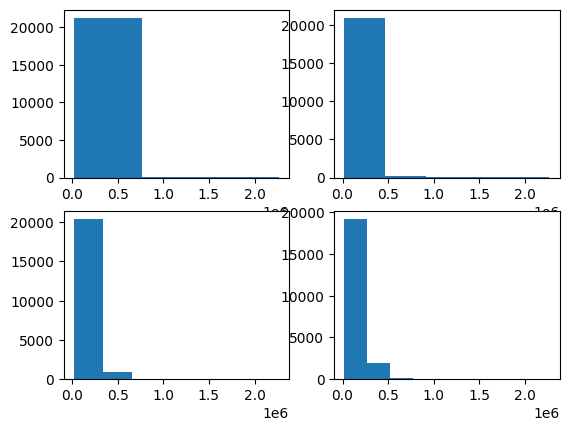

In [33]:
# Графики
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.hist(data['total_income'], bins=3)
plt.subplot(2,2,2)
plt.hist(data['total_income'], bins=5)
plt.subplot(2,2,3)
plt.hist(data['total_income'], bins=7)
plt.subplot(2,2,4)
plt.hist(data['total_income'], bins=9)

Как мы видим распределение сильно скошено влево с большим количеством выбросов в виде аномально больших зарплат, что в общем то не удивительно. Из-за это подбор интервалов с равным количеством человек является проблематичным, хотя наверное и существуют методы, но они (ещё?) не были освещены в материале курса. Поэтому рассчитаем обычный процент невозврата среди наших групп.

In [34]:
#напомним себе о цифровых интервалах групп
import inspect
print(inspect.getsource(categorize_income))

def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass


In [35]:
# средняя доля невозврата кредита
print('средняя доля невозврата кредита в процентах\n',
      data.groupby('total_income_category')['debt'].agg('mean')*100)

средняя доля невозврата кредита в процентах
 total_income_category
A    8.000000
B    7.060231
C    8.498210
D    6.017192
E    9.090909
Name: debt, dtype: float64


In [36]:
# Сводная таблица
data.groupby('total_income_category')['debt'].agg(['count', 'mean'])

,count,mean
total_income_category,,
A,25,0.080000
B,5014,0.070602
C,15921,0.084982
D,349,0.060172
E,22,0.090909


**Вывод:** По таблице видно, что чаще всего не возвращают кредиты люди с доходом менее 30 000 рублей. В тоже время интересно то что люди с доходом от миллиона не являются лидерами по возвратам. Однако стоит учитывать что краевые группы на несколько сотен порядков отличаются по размеру от группы С (от 50001 до 200000 рублей). Самыми большими группами являются B(от 200000 до 1000000) и C(от 50000 до 200000). В таблице видно что риск невозврата больше у группы С.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [37]:
# Взглянем на данные
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Нам необходим предварительно рассчитанный нами столбец purpose_category, так как он объединяет несколько по разному сформулированных, но одинаковых по смыслу целей в одну. Традиционно начнем с ознакомления с размерами групп.

In [38]:
# оценим размеры групп для сравнения
data.groupby('purpose_category')['purpose_category'].count()

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

Группы не равны между собой, однако всё не так плохо как в случае с зарплатами. Возможностей для объединения групп нет. Расчитаем долю невозврата кредита.

In [39]:
# средняя доля невозврата кредита
print('средняя доля невозврата кредита в процентах\n',
      data.groupby('purpose_category')['debt'].agg('mean')*100)

средняя доля невозврата кредита в процентах
 purpose_category
операции с автомобилем      9.347978
операции с недвижимостью    7.255139
получение образования       9.252758
проведение свадьбы          7.911803
Name: debt, dtype: float64


In [40]:
data.groupby('purpose_category')['debt'].agg(['count', 'mean'])

,count,mean
purpose_category,,
операции с автомобилем,4279,0.093480
операции с недвижимостью,10751,0.072551
получение образования,3988,0.092528
проведение свадьбы,2313,0.079118


**Вывод:** Ответственнее всего люди относятся к операциям с недвижимостью, образование и автокредиты в лидерах по невозвратам.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Возможно были недостатки при проектировке и создании БД, поля не сделали обязательными для заполнения и это не обнаружил QA инженер из-за невнятного описания бизнес-аналитика. Возможно один банк выкупил другой банк и у них были разные требования изначально и то что мы видим это объединенная таблица из двух банков. Возможно это объединенная таблица из разных систем одного и того же банка, где хранится разная информация.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнение пропусков является лучшим решением поскольку оно позволяет сохранить как можно больше строк, которые иначе пришлось бы удалить. Они не несут полезной информации по той переменной которая заполняется, но могут быть полезны при использовании других переменных. Выбор медианы обусловлен тем что медиана не чувствительна к выбросам(аномально большие или малые значения)

### Шаг 4: общий вывод.

В данном проекте был проанализирован датасет содержащий данные о кредитной просрочке, который позволил нам получить представление о надежности заёмщика. 
    
На первом этапе было получено общее преставление о датасете и проведена предварительная обработка. Предварительная обработка включала в себя импутацию, обработку аномальных значений, обработку дубликатов, изменение типов данных и категоризацию данных. Импутация - процесс заполнения пропущенных значений исходя из имеющихся данных. При получении общей информации о датасете было обнаружено что столбцы "доход" и "трудовой стаж" содержат пропуски. Пропуски были заполнены медианными значениями, которые были рассчитаны исходя из значений полученных группировкой по столбцу "тип занятости". Работа с аномальными значениями представляла собой конвертацию или удаление негативных значений там где их не должно быть логически, например -1 ребенок, 20 детей или отрицательный трудовой стаж. Также для удобства был изменен тип данных столбца содержащего данные о месячной зарплате. Для выброса дубликатов записи были приведены к одному регистру. Наконец была произведена категоризация данных по двум столбцам "ежемесячный доход" и "цель получения кредита". Столбец с доходом было необходимо категоризовать так как это численная переменная, а нам нужны были "корзины" для выявления зависимостей, поскольку расчет вероятности просрочки кредита для каждого дискретного значения з.п. не представляется возможным. Столбец с причиной необходимо было категоризовать так как он содержал много одинаковых по смыслу причин, но сформулированных по разному.
    
Второй этап был посвящен выявлению зависимостей между различными показателями и риском просрочки кредита. Первой была проанализирована зависимость между количеством детей и риском просрочки. Выяснилось что риск просрочки ниже всего у бездетных людей и равен 7.5%, в то время как риск просрочки у людей с 1 и 2 детьми 9.2 и 9.4 процента соответственно. Однако стоит отметить что проценты невозврата кредита для людей с 3 и более детьми не являются репрезентативными из-за маленькой выборки. Следующей была проанализирована взаимосвязь между семейным положением и риском просрочки кредита. Выяснилось что наибольший риск представляют люди никогда не состоявшие в браке, у них риск просрочки более 9%, в то время как у людей состоявших в официальном браке риск от 6.6% до 7.5%. Далее были рассчитаны риски просрочки по кредиту в зависимости от дохода. Данные оказались сильно перекошенными, из-за очень маленького размера групп. Пригодными для сравнения группами являются B(от 200000 до 1000000) и C(от 50000 до 200000). Риск просрочки больше у группы С и равен 8.4 процента, тогда как у группы B риск просрочки составлят 7 процентов. Затем была рассмотрена зависимость между целью взятия кредита и риском просрочки. Наименьший риск просрочки у кредитов на операции с недвижимостью, он составляет 7.2 процента. Наибольший у автокредита - 9.2 процента.
    
Исходя из анализа датасета можно составить портрет идеального заемщика - это бездетный овдовевший человек с доходом от 50 до 200 тысяч рублей который хочет взять займ на операции с недвижимостью. Портрет наихудшего заемщика - это человек с 2мя детьми не состоящий в браке с доходом менее 50 тысяч рублей который хочет взять займ на покупку автомобиля.